In [112]:
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
from math import *

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


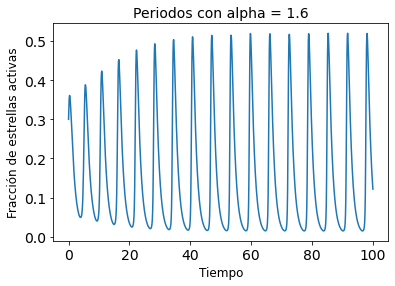

In [113]:
T=100
h=0.1
n=int(T/h)
alpha=1.6

def f(t,y):
  a=y[0]
  m=y[1]
  s=y[2]

  k_1=8
  k_2=15

  dA_dt=s-k_1*a*m**2
  dM_dt=k_1*a*m**2-k_2*s*m**alpha
  dS_dt=s*k_2*m**alpha-s

  return np.array([dA_dt, dM_dt, dS_dt])
#def ds_dt(s,m,k_2,alpha):
 # return s*k_2*m**alpha-s
#def da_dt(s,a,m,k_1):
  #return s-k_1*a*m**2
#def dm_dt(s,a,m,k_1,k_2,alpha):
 #  return k_1*a*m**2-k_2*s*m**alpha

# (3) Set times
t_span=np.array([0,T])
times=np.linspace(t_span[0], t_span[1],n)

# (4) Set initial conditions
y0=np.array([0.4,0.3,0.3])

soln=solve_ivp(f,t_span,y0, t_eval=times)
t_1=soln.t
A=soln.y[0]
M=soln.y[1]
S=soln.y[2]

# Dibujamos la solución
plt.rc("font",size=14)
plt.figure()
#plt.plot(t, A, '-', label='A')
#plt.plot(t, M, '-', label='M')
plt.plot(times, S, '-', label='S')
plt.xlabel("Tiempo", size=12)
plt.ylabel("Fracción de estrellas activas", size=12)
plt.title("Periodos con alpha = "+str(alpha), size=14)
#plt.legend()
plt.show()

Text(0, 0.5, 'alpha')

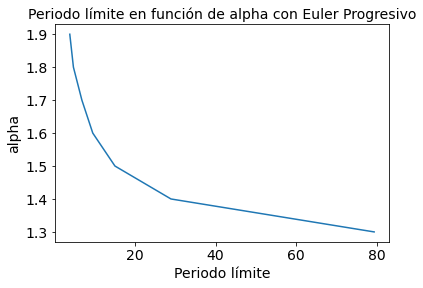

In [114]:
#Copiamos la parte C

import numpy as np
import matplotlib.pyplot as plt
from math import *

def ds_dt(s,m,k_2,alpha):
  return s*(k_2*(m**alpha)-1) 
def da_dt(s,a,m,k_1):
  return s-k_1*(m**2)*a 
def dm_dt(s,a,m,k_1,k_2,alpha):
   return k_1*(m**2)*a-k_2*(m**alpha)*s  
T=300
h=0.1
n=int(T/h)
#constantes k1 y k2
k_1=8
k_2=15
#vectores con n cantidad de ceros para cada parametro
ejx=np.linspace(0,T,n)
s=np.zeros(n)
a=np.zeros(n)
m=np.zeros(n)
#condiciones iniciales
s[0]=0.3
a[0]=0.4
m[0]=0.3

#primera prueba: alpha=1.3
alpha=1.3
#se define cada elemento de los vectores s, a y m con la instrucción for
for i in range(0,n-1):
  s[i+1]=s[i]+h*ds_dt(s[i] ,m[i]    ,k_2         ,alpha)  
  a[i+1]=a[i]+h*da_dt(s[i]   ,a[i] ,m[i] ,k_1      )
  m[i+1]=m[i]+h*dm_dt(s[i],a[i], m[i], k_1,k_2,alpha)

L=[] 

for l in range (0,len(s)-2):

  if  s[l+1]>s[l+2] and s[l+1]>s[l]:
    L.append(l)


L_invertida=np.flip(L)
P1e=ejx[L_invertida[0]]-ejx[L_invertida[1]] # Le cambiamos el nombre a P1e (la e por euler)

#Segunda prueba: alpha=1.4
alpha=1.4
# Se redefine el tiempo
T=100
#se define cada elemento de los vectores s, a y m con la instrucción for
for i in range(0,n-1):
  s[i+1]=s[i]+h*ds_dt(s[i] ,m[i]    ,k_2         ,alpha)  
  a[i+1]=a[i]+h*da_dt(s[i]   ,a[i] ,m[i] ,k_1      )
  m[i+1]=m[i]+h*dm_dt(s[i],a[i], m[i]    , k_1    ,k_2    ,alpha    )

L=[] 

for l in range (0,len(s)-2):

  if  s[l+1]>s[l+2] and s[l+1]>s[l]:
    L.append(l)


L_invertida=np.flip(L)
P2e=ejx[L_invertida[0]]-ejx[L_invertida[1]]

# Tercera prueba: alpha=1.5
alpha=1.5
# Se redefine el tiempo
T=100
#se define cada elemento de los vectores s, a y m con la instrucción for
for i in range(0,n-1):
  s[i+1]=s[i]+h*ds_dt(s[i] ,m[i]    ,k_2         ,alpha)  
  a[i+1]=a[i]+h*da_dt(s[i]   ,a[i] ,m[i] ,k_1      )
  m[i+1]=m[i]+h*dm_dt(s[i],a[i], m[i]    , k_1    ,k_2    ,alpha    )

L=[] 

for l in range (0,len(s)-2):

  if  s[l+1]>s[l+2] and s[l+1]>s[l]:
    L.append(l)


L_invertida=np.flip(L)
P3e=ejx[L_invertida[0]]-ejx[L_invertida[1]]

# Cuarta prueba: alpha=1.6
# Se redefine el tiempo
T=100
alpha=1.6
#se define cada elemento de los vectores s, a y m con la instrucción for
for i in range(0,n-1):
  s[i+1]=s[i]+h*ds_dt(s[i] ,m[i]    ,k_2         ,alpha)  
  a[i+1]=a[i]+h*da_dt(s[i]   ,a[i] ,m[i] ,k_1      )
  m[i+1]=m[i]+h*dm_dt(s[i],a[i], m[i]    , k_1    ,k_2    ,alpha    )

L=[] 

for l in range (0,len(s)-2):

  if  s[l+1]>s[l+2] and s[l+1]>s[l]:
    L.append(l)


L_invertida=np.flip(L)
P4e=ejx[L_invertida[0]]-ejx[L_invertida[1]]

# Quinta prueba: alpha=1.7
alpha=1.7
# Se redefine el tiempo
T=100
#se define cada elemento de los vectores s, a y m con la instrucción for
for i in range(0,n-1):
  s[i+1]=s[i]+h*ds_dt(s[i] ,m[i]    ,k_2         ,alpha)  
  a[i+1]=a[i]+h*da_dt(s[i]   ,a[i] ,m[i] ,k_1      )
  m[i+1]=m[i]+h*dm_dt(s[i],a[i], m[i]    , k_1    ,k_2    ,alpha    )

L=[] 

for l in range (0,len(s)-2):

  if  s[l+1]>s[l+2] and s[l+1]>s[l]:
    L.append(l)


L_invertida=np.flip(L)
P5e=ejx[L_invertida[0]]-ejx[L_invertida[1]]

# Sexta prueba: alpha=1.8
alpha=1.8
# Se redefine el tiempo
T=100
#se define cada elemento de los vectores s, a y m con la instrucción for
for i in range(0,n-1):
  s[i+1]=s[i]+h*ds_dt(s[i] ,m[i]    ,k_2         ,alpha)  
  a[i+1]=a[i]+h*da_dt(s[i]   ,a[i] ,m[i] ,k_1      )
  m[i+1]=m[i]+h*dm_dt(s[i],a[i], m[i]    , k_1    ,k_2    ,alpha    )

L=[] 

for l in range (0,len(s)-2):

  if  s[l+1]>s[l+2] and s[l+1]>s[l]:
    L.append(l)


L_invertida=np.flip(L)
P6e=ejx[L_invertida[0]]-ejx[L_invertida[1]]

# Séptima prueba: alpha=1.9
alpha=1.9
# Se redefine el tiempo
T=100
#se define cada elemento de los vectores s, a y m con la instrucción for
for i in range(0,n-1):
  s[i+1]=s[i]+h*ds_dt(s[i] ,m[i]    ,k_2         ,alpha)  
  a[i+1]=a[i]+h*da_dt(s[i]   ,a[i] ,m[i] ,k_1      )
  m[i+1]=m[i]+h*dm_dt(s[i],a[i], m[i]    , k_1    ,k_2    ,alpha    )

L=[] 

for l in range (0,len(s)-2):

  if  s[l+1]>s[l+2] and s[l+1]>s[l]:
    L.append(l)


L_invertida=np.flip(L)
P7e=ejx[L_invertida[0]]-ejx[L_invertida[1]]

# Periodo límite con el método de Euler progresivo
P=[P1e,P2e,P3e,P4e,P5e,P6e,P7e]
A=[1.3,1.4,1.5,1.6,1.7,1.8,1.9]

plt.plot(P,A)

plt.title("Periodo límite en función de alpha con Euler Progresivo", size=14)
plt.xlabel("Periodo límite")
plt.ylabel("alpha")

Text(0, 0.5, 'alpha')

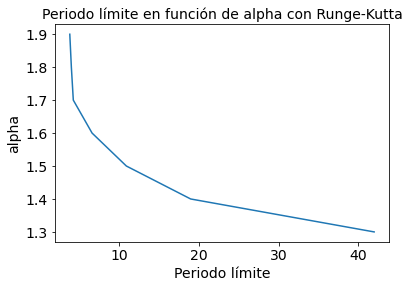

In [115]:
# Copiamos la parte D
def ds_dt(s,m,k_2,alpha):
  return (s*k_2*(m**alpha)-s) 
def da_dt(s,a,m,k_1):
  return s-k_1*a*(m**2)
def dm_dt(s,a,m,k_1,k_2,alpha):
  return k_1*a*(m**2)-k_2*s*(m**alpha)



T=100
h=0.001
n=int(T/h)
ejx=np.linspace(0,T,n)

alpha=1.3

k1=8
k2=15


s1=np.zeros(n)
a1=np.zeros(n)
m1=np.zeros(n)

s1[0]=0.3
a1[0]=0.4
m1[0]=0.3

def rk_s(h,s,m,k2,alpha): # Para s
  b1s=ds_dt(s,m,k2,alpha)
  b2s=ds_dt(s+(h/2)*b1s,m+(h/2)*b1s,k2,alpha)
  b3s=ds_dt(s+(h/2)*b2s,m+(h/2)*b2s,k2,alpha)
  b4s=ds_dt(s+(h/2)*b3s,m+(h/2)*b3s,k2,alpha)
  return (h/6)*(b1s+2*b2s+2*b3s+b4s)

def rk_a(h,s,a,m,k1): # Para a
  b1a=da_dt(s,a,m,k1)
  b2a=da_dt(s+(h/2)*b1a,a+(h/2)*b1a,m+(h/2)*b1a,k1)
  b3a=da_dt(s+(h/2)*b2a,a+(h/2)*b2a,m+(h/2)*b2a,k1)
  b4a=da_dt(s+(h/2)*b3a,a+(h/2)*b3a,m+(h/2)*b3a,k1)
  return (h/6)*(b1a+2*b2a+2*b3a+b4a)


def rk_m(h,s,a,m,k1,k2,alpha): # Para m
  b1m=dm_dt(s,a,m,k1,k2,alpha)
  b2m=dm_dt(s+(h/2)*b1m,a+(h/2)*b1m,m+(h/2)*b1m,k1,k2,alpha)
  b3m=dm_dt(s+(h/2)*b2m,a+(h/2)*b2m,m+(h/2)*b2m,k1,k2,alpha)
  b4m=dm_dt(s+(h/2)*b3m,a+(h/2)*b3m,m+(h/2)*b3m,k1,k2,alpha)
  return (h/6)*(b1m+2*b2m+2*b3m+b4m)

for j in range(1,n):  
  s1[j]=s1[j-1]+   rk_s(h,s1[j-1],m1[j-1],k2,alpha)             
  a1[j]=a1[j-1]+   rk_a(h,s1[j-1],a1[j-1],m1[j-1],k1) 
  m1[j]=m1[j-1]+    rk_m(h,s1[j-1],a1[j-1],m1[j-1],k1,k2,alpha)   

L=[] 

for l in range (0,len(s1)-2):

  if  s1[l+1]>s1[l+2] and s1[l+1]>s1[l]:
    L.append(l)


L_invertida=np.flip(L)
P1r=ejx[L_invertida[0]]-ejx[L_invertida[1]]

alpha=1.4

for j in range(1,n):  
  s1[j]=s1[j-1]+   rk_s(h,s1[j-1],m1[j-1],k2,alpha)             
  a1[j]=a1[j-1]+   rk_a(h,s1[j-1],a1[j-1],m1[j-1],k1) 
  m1[j]=m1[j-1]+    rk_m(h,s1[j-1],a1[j-1],m1[j-1],k1,k2,alpha)   

L=[] 

for l in range (0,len(s1)-2):

  if  s1[l+1]>s1[l+2] and s1[l+1]>s1[l]:
    L.append(l)


L_invertida=np.flip(L)
P2r=ejx[L_invertida[0]]-ejx[L_invertida[1]]

alpha=1.5

for j in range(1,n):  
  s1[j]=s1[j-1]+   rk_s(h,s1[j-1],m1[j-1],k2,alpha)             
  a1[j]=a1[j-1]+   rk_a(h,s1[j-1],a1[j-1],m1[j-1],k1) 
  m1[j]=m1[j-1]+    rk_m(h,s1[j-1],a1[j-1],m1[j-1],k1,k2,alpha)   

L=[] 

for l in range (0,len(s1)-2):

  if  s1[l+1]>s1[l+2] and s1[l+1]>s1[l]:
    L.append(l)


L_invertida=np.flip(L)
P3r=ejx[L_invertida[0]]-ejx[L_invertida[1]]

alpha=1.6

for j in range(1,n):  
  s1[j]=s1[j-1]+   rk_s(h,s1[j-1],m1[j-1],k2,alpha)             
  a1[j]=a1[j-1]+   rk_a(h,s1[j-1],a1[j-1],m1[j-1],k1) 
  m1[j]=m1[j-1]+    rk_m(h,s1[j-1],a1[j-1],m1[j-1],k1,k2,alpha)   

L=[] 

for l in range (0,len(s1)-2):

  if  s1[l+1]>s1[l+2] and s1[l+1]>s1[l]:
    L.append(l)


L_invertida=np.flip(L)
P4r=ejx[L_invertida[0]]-ejx[L_invertida[1]]

alpha=1.7

for j in range(1,n):  
  s1[j]=s1[j-1]+   rk_s(h,s1[j-1],m1[j-1],k2,alpha)             
  a1[j]=a1[j-1]+   rk_a(h,s1[j-1],a1[j-1],m1[j-1],k1) 
  m1[j]=m1[j-1]+    rk_m(h,s1[j-1],a1[j-1],m1[j-1],k1,k2,alpha)   

L=[] 

for l in range (0,len(s1)-2):

  if  s1[l+1]>s1[l+2] and s1[l+1]>s1[l]:
    L.append(l)


L_invertida=np.flip(L)
P5r=ejx[L_invertida[0]]-ejx[L_invertida[1]]

alpha=1.8

for j in range(1,n):  
  s1[j]=s1[j-1]+   rk_s(h,s1[j-1],m1[j-1],k2,alpha)             
  a1[j]=a1[j-1]+   rk_a(h,s1[j-1],a1[j-1],m1[j-1],k1) 
  m1[j]=m1[j-1]+    rk_m(h,s1[j-1],a1[j-1],m1[j-1],k1,k2,alpha)   

L=[] 

for l in range (0,len(s1)-2):

  if  s1[l+1]>s1[l+2] and s1[l+1]>s1[l]:
    L.append(l)


L_invertida=np.flip(L)
P6r=ejx[L_invertida[0]]-ejx[L_invertida[1]]

alpha=1.9

for j in range(1,n):  
  s1[j]=s1[j-1]+   rk_s(h,s1[j-1],m1[j-1],k2,alpha)             
  a1[j]=a1[j-1]+   rk_a(h,s1[j-1],a1[j-1],m1[j-1],k1) 
  m1[j]=m1[j-1]+    rk_m(h,s1[j-1],a1[j-1],m1[j-1],k1,k2,alpha)   

L=[] 

for l in range (0,len(s1)-2):

  if  s1[l+1]>s1[l+2] and s1[l+1]>s1[l]:
    L.append(l)


L_invertida=np.flip(L)
P7r=ejx[L_invertida[0]]-ejx[L_invertida[1]]

P=[P1r,P2r,P3r,P4r,P5r,P6r,P7r]
A=[1.3,1.4,1.5,1.6,1.7,1.8,1.9]

plt.plot(P,A)

plt.title("Periodo límite en función de alpha con Runge-Kutta", size=14)
plt.xlabel("Periodo límite")
plt.ylabel("alpha")

In [116]:
# Ahora, calculamos el periodo límite de esta parte (E)

import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Condiciones temporales
T=100
h=0.001
n=int(T/h)

# definiendo los ejes x e y
x=np.linspace(0,T,n)
ejy=alpha

#Primer caso
alpha=1.3

#Buscamos los máximos
peaks=find_peaks(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


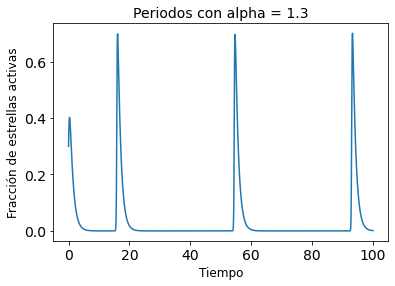

In [117]:
# Calculamos los periodos límite con la librería de Python
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

T=100
h=0.1
n=int(T/h)
alpha=1.3

def f(t,y):
  a=y[0]
  m=y[1]
  s=y[2]

  k_1=8
  k_2=15

  dA_dt=s-k_1*a*m**2
  dM_dt=k_1*a*m**2-k_2*s*m**alpha
  dS_dt=s*k_2*m**alpha-s

  return np.array([dA_dt, dM_dt, dS_dt])

# Definimos los tiemoos
t_span=np.array([0,T])
times=np.linspace(t_span[0], t_span[1],n)

# Definimos las condiciones iniciales
y0=np.array([0.4,0.3,0.3])

soln=solve_ivp(f,t_span,y0, t_eval=times)
t_1=soln.t
A=soln.y[0]
M=soln.y[1]
S=soln.y[2]

# Dibujamos la solución
plt.rc("font",size=14)
plt.figure()
plt.plot(times, S, '-', label='S')
plt.xlabel("Tiempo", size=12)
plt.ylabel("Fracción de estrellas activas", size=12)
plt.title("Periodos con alpha = "+str(alpha), size=14)
plt.show()

# Ahora, calculamos el periodo límite

#Buscamos los máximos mediante find_peaks
peaks=find_peaks(S,height=0.1)
index_peaks=peaks[0]
P1l=(index_peaks[-1]-index_peaks[-2])/10 # obtenemos el valor del último periodo

In [118]:
# Calculamos los periodos límite con la librería de Python
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

T=100
h=0.1
n=int(T/h)
alpha=1.4

def f(t,y):
  a=y[0]
  m=y[1]
  s=y[2]

  k_1=8
  k_2=15

  dA_dt=s-k_1*a*m**2
  dM_dt=k_1*a*m**2-k_2*s*m**alpha
  dS_dt=s*k_2*m**alpha-s

  return np.array([dA_dt, dM_dt, dS_dt])

# Definimos los tiemoos
t_span=np.array([0,T])
times=np.linspace(t_span[0], t_span[1],n)

# Definimos las condiciones iniciales
y0=np.array([0.4,0.3,0.3])

soln=solve_ivp(f,t_span,y0, t_eval=times)
t_1=soln.t
A=soln.y[0]
M=soln.y[1]
S=soln.y[2]

# Ahora, calculamos el periodo límite

#Buscamos los máximos mediante find_peaks
peaks=find_peaks(S,height=0.1)
index_peaks=peaks[0]
P2l=(index_peaks[-1]-index_peaks[-2])/10 # obtenemos el valor del último periodo
print(P2l)

18.1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [119]:
# Calculamos los periodos límite con la librería de Python
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

T=100
h=0.1
n=int(T/h)
alpha=1.5

def f(t,y):
  a=y[0]
  m=y[1]
  s=y[2]

  k_1=8
  k_2=15

  dA_dt=s-k_1*a*m**2
  dM_dt=k_1*a*m**2-k_2*s*m**alpha
  dS_dt=s*k_2*m**alpha-s

  return np.array([dA_dt, dM_dt, dS_dt])

# Definimos los tiemoos
t_span=np.array([0,T])
times=np.linspace(t_span[0], t_span[1],n)

# Definimos las condiciones iniciales
y0=np.array([0.4,0.3,0.3])

soln=solve_ivp(f,t_span,y0, t_eval=times)
t_1=soln.t
A=soln.y[0]
M=soln.y[1]
S=soln.y[2]

# Ahora, calculamos el periodo límite

#Buscamos los máximos mediante find_peaks
peaks=find_peaks(S,height=0.1)
index_peaks=peaks[0]
P3l=(index_peaks[-1]-index_peaks[-2])/10 # obtenemos el valor del último periodo
print(P3l)

10.4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [120]:
# Calculamos los periodos límite con la librería de Python
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

T=100
h=0.1
n=int(T/h)
alpha=1.6

def f(t,y):
  a=y[0]
  m=y[1]
  s=y[2]

  k_1=8
  k_2=15

  dA_dt=s-k_1*a*m**2
  dM_dt=k_1*a*m**2-k_2*s*m**alpha
  dS_dt=s*k_2*m**alpha-s

  return np.array([dA_dt, dM_dt, dS_dt])

# Definimos los tiemoos
t_span=np.array([0,T])
times=np.linspace(t_span[0], t_span[1],n)

# Definimos las condiciones iniciales
y0=np.array([0.4,0.3,0.3])

soln=solve_ivp(f,t_span,y0, t_eval=times)
t_1=soln.t
A=soln.y[0]
M=soln.y[1]
S=soln.y[2]

# Ahora, calculamos el periodo límite

#Buscamos los máximos mediante find_peaks
peaks=find_peaks(S,height=0.1)
index_peaks=peaks[0]
P4l=(index_peaks[-1]-index_peaks[-2])/10 # obtenemos el valor del último periodo
print(P4l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


6.4


In [121]:
# Calculamos los periodos límite con la librería de Python
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

T=100
h=0.1
n=int(T/h)
alpha=1.7

def f(t,y):
  a=y[0]
  m=y[1]
  s=y[2]

  k_1=8
  k_2=15

  dA_dt=s-k_1*a*m**2
  dM_dt=k_1*a*m**2-k_2*s*m**alpha
  dS_dt=s*k_2*m**alpha-s

  return np.array([dA_dt, dM_dt, dS_dt])

# Definimos los tiemoos
t_span=np.array([0,T])
times=np.linspace(t_span[0], t_span[1],n)

# Definimos las condiciones iniciales
y0=np.array([0.4,0.3,0.3])

soln=solve_ivp(f,t_span,y0, t_eval=times)
t_1=soln.t
A=soln.y[0]
M=soln.y[1]
S=soln.y[2]

# Ahora, calculamos el periodo límite

#Buscamos los máximos mediante find_peaks
peaks=find_peaks(S,height=0.1)
index_peaks=peaks[0]
P5l=(index_peaks[-1]-index_peaks[-2])/10 # obtenemos el valor del último periodo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [122]:
# Calculamos los periodos límite con la librería de Python
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

T=100
h=0.1
n=int(T/h)
alpha=1.8

def f(t,y):
  a=y[0]
  m=y[1]
  s=y[2]

  k_1=8
  k_2=15

  dA_dt=s-k_1*a*m**2
  dM_dt=k_1*a*m**2-k_2*s*m**alpha
  dS_dt=s*k_2*m**alpha-s

  return np.array([dA_dt, dM_dt, dS_dt])

# Definimos los tiemoos
t_span=np.array([0,T])
times=np.linspace(t_span[0], t_span[1],n)

# Definimos las condiciones iniciales
y0=np.array([0.4,0.3,0.3])

soln=solve_ivp(f,t_span,y0, t_eval=times)
t_1=soln.t
A=soln.y[0]
M=soln.y[1]
S=soln.y[2]

# Ahora, calculamos el periodo límite

#Buscamos los máximos mediante find_peaks
peaks=find_peaks(S,height=0.1)
index_peaks=peaks[0]
P6l=(index_peaks[-1]-index_peaks[-2])/10 # obtenemos el valor del último periodo

In [123]:
# Calculamos los periodos límite con la librería de Python
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

T=100
h=0.1
n=int(T/h)
alpha=1.9

def f(t,y):
  a=y[0]
  m=y[1]
  s=y[2]

  k_1=8
  k_2=15

  dA_dt=s-k_1*a*m**2
  dM_dt=k_1*a*m**2-k_2*s*m**alpha
  dS_dt=s*k_2*m**alpha-s

  return np.array([dA_dt, dM_dt, dS_dt])

# Definimos los tiemoos
t_span=np.array([0,T])
times=np.linspace(t_span[0], t_span[1],n)

# Definimos las condiciones iniciales
y0=np.array([0.4,0.3,0.3])

soln=solve_ivp(f,t_span,y0, t_eval=times)
t_1=soln.t
A=soln.y[0]
M=soln.y[1]
S=soln.y[2]

# Ahora, calculamos el periodo límite

#Buscamos los máximos mediante find_peaks
peaks=find_peaks(S,height=0.1)
index_peaks=peaks[0]
P7l=(index_peaks[-1]-index_peaks[-2])/10 # obtenemos el valor del último periodo

Text(0.5, 0, 'alpha')

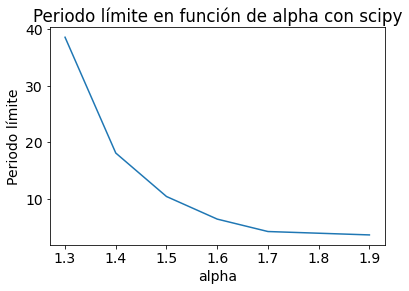

In [138]:
#Graficamos los periodos límites del método utilizado con scipy
P=[P1l,P2l,P3l,P4l,P5l,P6l,P7l]
A=[1.3,1.4,1.5,1.6,1.7,1.8,1.9]

plt.plot(A,P)

plt.title("Periodo límite en función de alpha con scipy")
plt.ylabel("Periodo límite")
plt.xlabel("alpha")

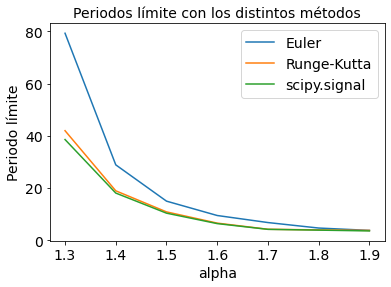

In [137]:
periodos_euler=[P1e,P2e,P3e,P4e,P5e,P6e,P7e]
periodos_runge=[P1r,P2r,P3r,P4r,P5r,P6r,P7r]
periodos_libreria=[P1l,P2l,P3l,P4l,P5l,P6l,P7l]

A=[1.3,1.4,1.5,1.6,1.7,1.8,1.9]

plt.plot(A,periodos_euler,A,periodos_runge,A,periodos_libreria)

plt.title("Periodos límite con los distintos métodos", size=14)
plt.ylabel("Periodo límite")
plt.xlabel("alpha")
plt.legend(("Euler","Runge-Kutta","scipy.signal"))